### adopted from: https://www.kaggle.com/bhouwens/how-much-sugar-do-we-eat

# Data taken from OpenFoodFacts: 
https://world.openfoodfacts.org/data
https://www.kaggle.com/openfoodfacts/world-food-facts

# Data descrption:
https://static.openfoodfacts.org/data/data-fields.txt

# How Much Sugar Do We Eat?

Objective: to see how much of particular ingredients the people of certain countries eat in their food.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
world_food_facts = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')
world_food_facts.countries = world_food_facts.countries.str.lower()
world_food_facts.columns


Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [82]:
world_food_facts.loc[(world_food_facts['countries'].notna()) & (world_food_facts['countries'].str.contains('japan')), 'countries'].unique()

array(['japan', 'japan,france', 'france,japan',
       'france,hong kong,japan,taiwan,united states,belgium',
       'australia,japan'], dtype=object)

In [83]:
world_food_facts.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Text(0.5,1,'Proportion of NaNs in each column')

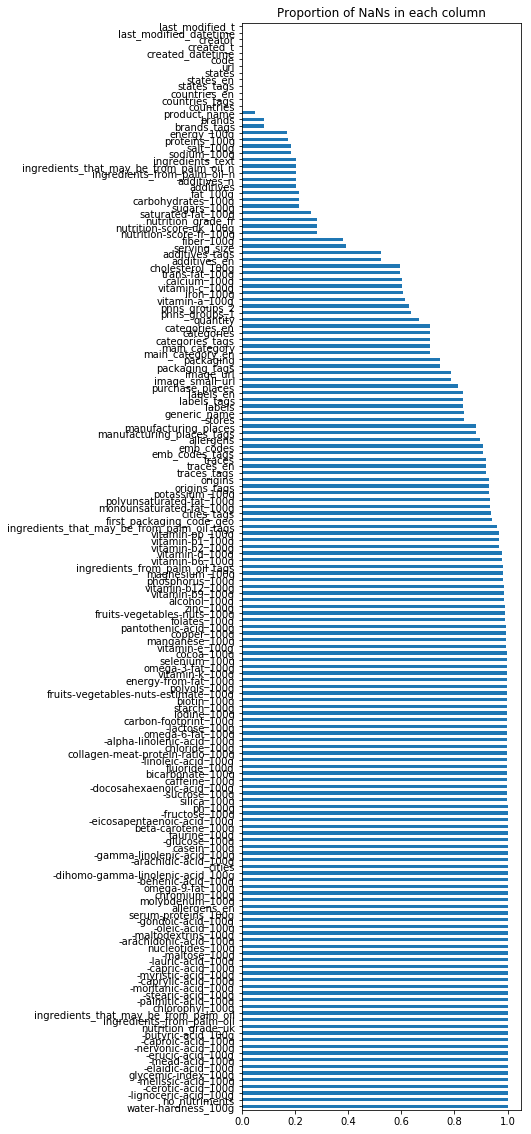

In [84]:
plt.figure(figsize=(5, 20))
world_food_facts.isnull().mean(axis=0).sort_values(ascending=False).plot.barh()
plt.title("Proportion of NaNs in each column")

In [85]:
world_food_facts.groupby(['countries']).size().sort_values(ascending=False).head(30)

countries
us                 169789
france             106299
en:fr               16056
suisse              12003
deutschland          6900
españa               3896
united kingdom       3367
united states        2365
en:ch                2207
en:be                1759
en:gb                1647
australia            1485
en:fr,france         1483
россия               1377
en:es                1104
en:de                1093
en:us                 909
belgique              830
en:au                 714
en:it                 660
en:ca                 613
portugal              589
switzerland           544
italia                456
france, suisse        455
germany               422
spain                 419
france,suisse         387
belgique,france       382
canada                360
dtype: int64

In [86]:
countries = {'france': 'fr', 
             'en:fr': 'fr', 
             'en:fr,france': 'fr', 
             'south africa': 'za',
            'united kingdom': 'uk',
            'en:gb': 'uk',
            'united states': 'us',
            'en:us': 'us',
            'spain': 'es',
            'españa': 'es',
            'en:es': 'es',
            'holland': 'nd',
            'netherlands': 'nd',
            'australia': 'au',
            'en:au': 'au',
            'canada': 'ca',
            'en:cn': 'ca',
            'germany': 'de',
            'deutschland': 'de',
            'suisse': 'ch',
            'en:ch': 'ch',
            'en:be': 'be', 
            'en:de': 'de', 
            'belgique': 'be',
            'россия': 'ru',
            'republic of china': 'cn', 'china': 'cn', 'en:cn': 'cn',
            'japan': 'jp', 'france,japan': 'jp'}
my_countries = set(countries.values())

In [87]:
world_food_facts['countries'] = world_food_facts['countries'] \
.apply(lambda x: countries.get(x, np.nan))


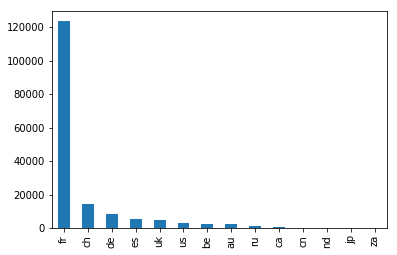

In [88]:
world_food_facts["countries"].value_counts().plot.bar()


In [89]:
world_food_facts = world_food_facts[world_food_facts['countries'].notnull()]
world_food_facts.shape

(167070, 163)

## Sugar
The first check was how much sugar a number of countries take in. Companies have been putting more and more sugar into the products we eat for a number of decades now, particularly in products like soft drinks/sodas, which isn't great for our bodies. There are some stereotypical guesses one could make about the countries that consume the most sugar, but doing some data analysis is generally more informative. 

In [92]:
world_sugar = world_food_facts.loc[(world_food_facts['sugars_100g'].notnull()) & 
                                   (world_food_facts['countries'].isin(my_countries)), 
                                   ['countries', 'sugars_100g']]
print(world_sugar.shape)
world_sugar.head()


(112118, 2)


,countries,sugars_100g
176,ca,0.00
177,ca,28.10
182,ca,24.70
183,ca,1.11
185,fr,13.60


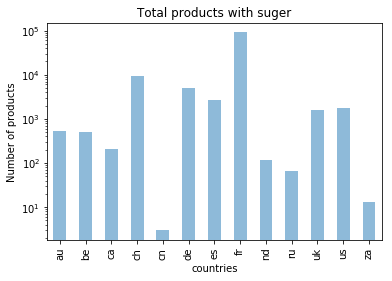

In [93]:
sugar_mean = world_sugar.groupby('countries').count()
sugar_mean.plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Total products with suger')
plt.ylabel('Number of products')
plt.yscale('log')


Text(0,0.5,'Sugar/100g')

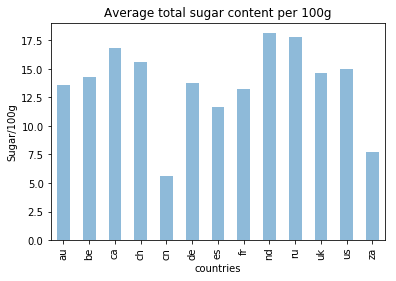

In [94]:
sugar_mean = world_sugar.groupby('countries').mean()
sugar_mean.plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Average total sugar content per 100g')
plt.ylabel('Sugar/100g')


## Which countries eat the most sugar?

Interesting results, although for a number of countries the amount of data is a lot less (particularly countries like South Africa), and thus the data can be skewed. Another interesting note is the lack of any data on total sugars for Asian countries such as Japan and China (which has 2). Is this lack of data or lack of products?
Anyway, looks like everyone likes sugar!

I'm making an assumption that food in the database, tied to a country, is consumed on a regular basis by its citizens, or at least often enough to keep these products on the shelves. The ranking of the countries analysed was this:

1. **Netherlands**
2. **Russia**
3. **Canada**
4. **Swisserland**
5. **USA**
6. **UK**
7. **Belguim**
8. **Germany**
9. **Australia**
10. **France**
11. **Spain**
12. **South Africa**
13. **China**

In [95]:
world_sugar = world_sugar.groupby('countries').mean()
world_sugar.sort_values('sugars_100g', ascending=False)

,sugars_100g
countries,
nd,18.151983
ru,17.762554
ca,16.857270
ch,15.596723
us,15.009909
uk,14.599991
be,14.321371
de,13.748599
au,13.595398


# How Much Salt Do We Eat?

The other main ingredient that is criticised for its effects on health is salt, contained primarily in the sodium of a product's ingredient list. Again, data on Asia is sparse.

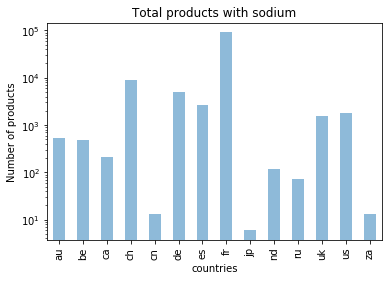

In [100]:
world_salt = world_food_facts.loc[world_food_facts['countries'].isin(my_countries), ['countries', 'sodium_100g']]

world_salt.groupby('countries').count().plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Total products with sodium')
plt.ylabel('Number of products')
plt.yscale('log')

Text(0,0.5,'Sodium/100g')

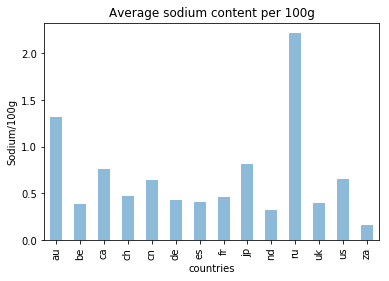

In [97]:
world_salt = world_food_facts.loc[world_food_facts['countries'].isin(my_countries), ['countries', 'sodium_100g']]

world_salt.groupby('countries').mean().plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Average sodium content per 100g')
plt.ylabel('Sodium/100g')

## Which countries eat the most salt?

Same as before, based on the same assumptions. Also of interest is that the amount of sodium in food, on average per 100g, is far, far less than the amount of sugar. 
We see that russians has almost 4 times as the average salt. Netherlands, on the other hand, like sweets but not salty foods.

Also, again, while china nad Japan are here, they almost don't have any ingedients with sodium.
The countries analysed were ranked like so:


In [98]:
world_salt = world_salt.groupby('countries').mean()
world_salt.sort_values('sodium_100g', ascending=False)

,sodium_100g
countries,
ru,2.217935
au,1.313692
jp,0.818932
ca,0.764317
us,0.657121
cn,0.641600
ch,0.472595
fr,0.459697
de,0.423975


# How Many Additives Are In Our Food?

Next is how many additives are in our food on average. 

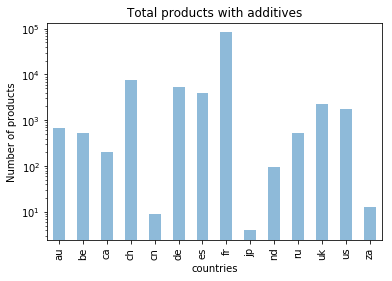

In [101]:
world_additives = world_food_facts.loc[world_food_facts['countries'].isin(my_countries), ['countries', 'additives_n']]

world_additives.groupby('countries').count().plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Total products with additives')
plt.ylabel('Number of products')
plt.yscale('log')

Text(0,0.5,'Amount of additives')

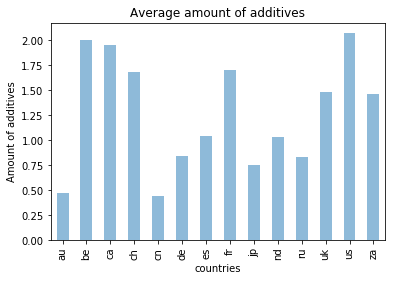

In [102]:
world_additives = world_food_facts.loc[world_food_facts['countries'].isin(my_countries), ['countries', 'additives_n']]

world_additives.groupby('countries').mean().plot.bar(align='center', alpha=0.5, legend=None)
plt.title('Average amount of additives')
plt.ylabel('Amount of additives')


## Which countries' food contains the most additives?

It seems like there aren't any countries who consistently have the loweset/highest averages for these supposedly unhealthy ingredients.

Notice for example that Australia and Russia which uses alot of suger and salt, but not addivites. South Africa, Chinaת and Japan consistently have lower amounts, but they also have only a few entries in the dataset in general, which means their results could be biased in relation to other countries.

Ranking of countries by the amount of additives in their food:


In [103]:
world_additives = world_additives.groupby('countries').mean()
world_additives.sort_values('additives_n', ascending=False)

,additives_n
countries,
us,2.070542
be,2.000000
ca,1.954774
fr,1.700412
ch,1.684518
uk,1.478640
za,1.461538
es,1.038017
nd,1.030928
